# Proyecto Modulo 2

+ Integrante1: Corrales Camacho Cuauhtémoc
+ Integrante2: Sánchez Covarrubias Marco Antonio
+ Integrante3: 

### *"Análisis de rendimientos de compañías automotrices y predicciones de precios para el año 2020"*

**Objetivo general:**
+ Elaborar un análisis de precios y rendimientos accionarios de corporaciones automovilísticas.

**Objetivos específicos:**
+ Investigar los valores accionarios del periodo 2018-2019 de empresas automotrices económicas. 
+ Calcular los rendimientos porcentuales de las compañías anteriores.
+ Predecir precios accionarios del próximo año para cada empresa correspondiente.

**Planteamiento del proyecto**

Durante el estudio de este modulo, se han visto en clase los siguientes temas: Simulación Montecarlo, Integración Montecarlo, Fractales Aleatorios y Probabilidad Precio Umbral. Para la elaboración de este proyecto, se eligió el último tópico, ya que todos los integrantes del equipo son estudiantes de finanzas. Se decidió poner en desarrollar el tema de Probabilidad Precio Umbral porque es el más relacionado al área de nuestra carrera. 

El proyecto conciste en un análisis considerablemente detallado acerca de los valores accionarios que las empresas automototrices Ford, Volkswagen, Honda y Nissan generaron desde el inicio del año 2018 hasta la actualidad. Con ellos se calcularan los rendimientos en un determinado periodo de tiempo mediante el uso de un sistema probabilístico.

Al final, con los resultados obtenidos, se calcularan matematicamente una lista de posibles precios accionarios futuros y se daran a conocer nuestras conclusiones finales.

**Modelo del problema**

In [1]:
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Para importar los datos historícos se hará uso de una función que extraiga el cúmulo de datos del sitio web "Yahoo Finanzas". Dicha función requerirá los siguientes parámetros:
+ El nombre del conjunto de acciones (**names**).
+ La fecha de inicio de los datos (**start**).
+ La fecha de límite de los datos (**end**).

Al ejecutar dicha función se le agregará el operador "*.dropna*" para que las filas de valores que serán representados en una tabla de formato pandas no contengan celdas sin valores.

Más tarde, se procesaran los precios mediante una función logarítmica para calcular los rendimientos diarios.

Después se calculará la media y la desviación estandar de los rendimentos obtenidos y se clasificarán por compañía para definir una función que simule escenarios aleatorios de los próximos rendimientos en un intervalo determinado. Dicha función tendrá los siguientes parametros:
+ La media (**mu**).
+ La desviación estandar (**std**).
+ El ciclo en días (**ndays**).
+ El número de escenarios requeridos (**nscen**).
+ La fecha de inicio de la predicción (**fecha_inicio**).

In [2]:
#Se importa el historico
def get_close(names,start,end):
    close=web.DataReader(name=names,data_source='yahoo',start=start,end=end)
    return close['Adj Close']

In [3]:
#Instrumentos
nombres=['F','VOW3.DE','HMC','NSANY']
# Fechas de interés (inicio y fin): 2013-2017
fecha_inicio='2018-01-01'
fecha_fin='2019-7-5'
# Función DataReader
cierres=get_close(nombres,fecha_inicio,fecha_fin).dropna()
print("Esta es la tabla de datos con la cual se trabajará")
cierres

Esta es la tabla de datos con la cual se trabajará


Symbols,F,HMC,NSANY,VOW3.DE
Date,,,,
2018-01-02,11.226595,33.041203,20.040001,156.690155
2018-01-03,11.315272,33.338268,20.250000,162.118057
2018-01-04,11.510363,33.980312,20.230000,164.954941
2018-01-05,11.705453,34.133633,20.389999,169.456100
2018-01-08,11.661115,34.306122,20.440001,170.061310
2018-01-09,11.599042,34.037807,20.540001,170.439560
2018-01-10,11.554701,34.766090,20.590000,168.510483
2018-01-11,11.669983,34.584023,20.750000,168.132233
2018-01-12,11.732057,34.430698,20.750000,170.042404


**Solución del problema y sus respectivas gráficas**

Los datos de la anterior tabla éstan representados por la gráfica debajo.


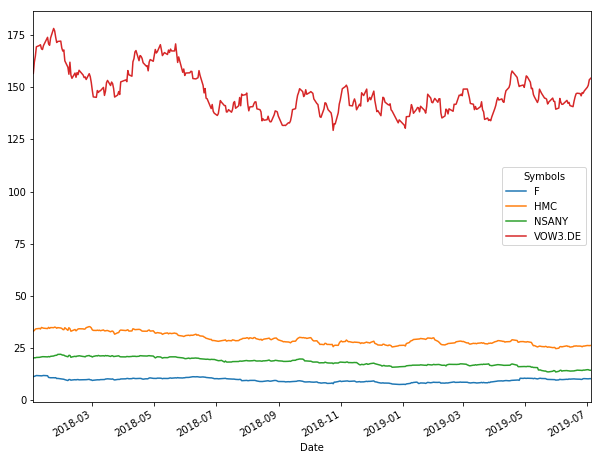

In [4]:
print("Los datos de la anterior tabla éstan representados por la gráfica debajo.")
cierres.plot(figsize=(10,8));

**En este caso, la simbología es la siguiente:**
+ *F* representa a Ford Motros Inc.
+ *HMC* representa a Honda Motors Corp.
+ *NSANY* representa a Nissan Motors Co.
+ *VOW3.DE* representa a Volkswagen AG.

In [5]:
#Simulacion de rendimientos diarios
# Calcular a diferencia logarítmica de precios y graficarlos
St=cierres
St1=cierres.shift()

Esta es la gráfica de los rendimientos diarios


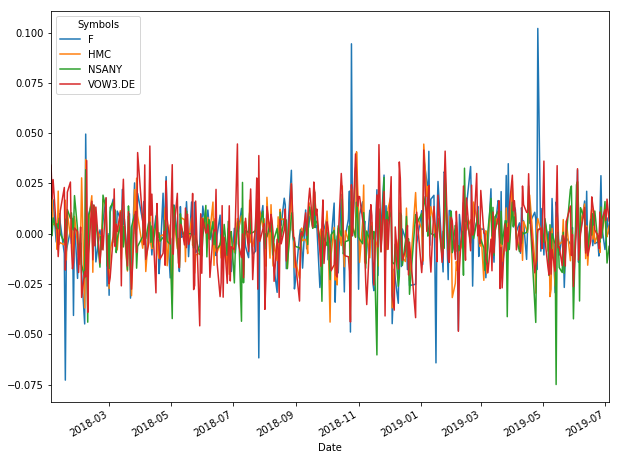

In [10]:
Ret=(np.log(St/St1)).dropna()
print("Esta es la gráfica de los rendimientos diarios")
Ret.plot(figsize=(10,8));

In [7]:
# Calculamos media 
muf=Ret.mean().F #Ford
muv=Ret.mean()['VOW3.DE'] #Volkswagen
muh=Ret.mean().HMC #Honda
mun=Ret.mean().NSANY #Nissan


print('El calculo de las medias es:')
muf,muv,muh,mun

El calculo de las medias es:


(-0.0002598856606974846,
 -3.639334657032569e-05,
 -0.0006328558912730867,
 -0.0009316649786128333)

In [8]:
# Calculamos desviación estándar
stdf=Ret.std().F  #Ford
stdv=Ret.std()['VOW3.DE'] #Volkswagen
stdh=Ret.std().HMC #Honda
stdn=Ret.std().NSANY #Nissan
print('El calculo de la desviación estándar es:')
stdf,stdv,stdh,stdn

El calculo de la desviación estándar es:


(0.01757653794706786,
 0.01728273049722626,
 0.01293766233373254,
 0.012618968480739142)

In [22]:
#Se define una función para simular diversos escenarios de rendimientos. 
def ret_simu(mu,std,ndays,nscen,fecha_inicio):
    dias = pd.date_range(start=fecha_inicio,periods=ndays)
    f_norm = std*np.random.randn(ndays,nscen) + mu
    return pd.DataFrame(data=f_norm,index=dias)

In [42]:
ndays = 539   #Este es el número de días restantes del 2019 más el año 2020
nscen = 50
fecha_inicio = "2019-7-9"

sim_Ret_F = ret_simu(muf,stdf,ndays,nscen,fecha_inicio)

sim_Ret_V = ret_simu(muv,stdv,ndays,nscen,fecha_inicio)

sim_Ret_H = ret_simu(muh,stdh,ndays,nscen,fecha_inicio)

sim_Ret_N = ret_simu(mun,stdn,ndays,nscen,fecha_inicio)

In [38]:
print("Esta es la simulación de rendimientos de Ford Motors Inc")
sim_Ret_F

Esta es la simulación de rendimientos de Ford Motors Inc


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2019-07-09,-0.010259,-0.012162,0.011052,-0.020155,0.030354,0.002068,0.006629,0.018585,0.003554,0.001593,...,-0.007479,0.010607,-0.009076,0.024311,-0.005589,0.002032,0.005763,-0.011907,0.008478,0.009902
2019-07-10,-0.004726,0.022156,-0.020555,-0.016016,0.002332,-0.031507,0.002116,0.024895,-0.017543,-0.019250,...,0.006802,-0.010477,-0.024772,-0.050533,0.036625,-0.000756,-0.003954,0.011491,0.019449,-0.023891
2019-07-11,-0.002467,-0.010267,-0.003282,0.004566,0.007086,0.007703,-0.018959,-0.009595,0.029977,0.014381,...,0.002594,0.028437,-0.002936,-0.000849,-0.010697,-0.003179,-0.009554,0.034532,0.021584,0.001345
2019-07-12,0.022487,0.009337,0.010024,0.003897,-0.003899,-0.013159,0.005058,-0.000688,0.008536,0.006723,...,0.015425,0.017608,-0.005734,-0.000120,0.004024,-0.006904,-0.004805,0.004299,-0.013636,-0.023163
2019-07-13,0.022006,0.009101,0.009806,0.010353,0.004909,-0.020932,-0.024717,0.000055,-0.003999,-0.026215,...,0.029083,-0.018163,-0.010289,-0.006505,0.012754,0.008398,-0.002282,-0.036579,0.000263,-0.016498
2019-07-14,-0.008676,-0.008924,-0.010121,0.027270,-0.012173,-0.051648,0.016774,0.020073,0.000640,-0.030166,...,0.001962,0.010347,-0.024896,0.004467,0.034732,0.001874,0.025115,-0.023308,-0.005718,0.000801
2019-07-15,-0.014644,0.009134,0.023358,0.020986,0.002578,0.018237,0.007125,-0.017299,-0.003320,-0.004981,...,-0.008299,-0.005191,-0.004425,-0.018341,0.000295,-0.015371,-0.030386,0.025184,-0.000470,0.002111
2019-07-16,0.016862,0.006315,-0.014873,-0.008135,-0.008470,-0.005902,-0.029169,0.005520,0.019306,0.004880,...,0.018811,0.000707,-0.015261,0.000598,0.024810,-0.002785,0.007662,0.025128,0.006828,0.025513
2019-07-17,-0.007059,-0.025458,0.011433,-0.033947,-0.011265,-0.018078,0.027362,-0.012755,-0.004566,-0.011449,...,-0.014944,-0.015971,0.051212,-0.035592,0.004267,-0.012825,-0.012382,0.016297,0.012008,-0.004134
2019-07-18,-0.001285,0.004477,-0.002390,0.024919,0.023698,0.014493,-0.002879,-0.019967,-0.005995,0.002272,...,-0.008963,-0.011704,0.009847,0.027497,0.026343,-0.022986,-0.014216,-0.013271,-0.019604,-0.021391


In [39]:
print("Esta es la simulación de rendimientos de Volkswagen AG")
sim_Ret_V

Esta es la simulación de rendimientos de Volkswagen AG


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2019-07-09,0.012573,0.014131,-0.013886,-0.020433,-0.017447,0.030531,-0.000953,1.967857e-02,-0.013258,0.004482,...,-0.005338,-0.012935,-0.007941,0.040275,-0.010807,0.009302,0.014062,-0.019463,-0.019679,0.022352
2019-07-10,0.014696,0.005870,-0.007874,0.025275,0.012443,-0.005438,-0.022867,7.539616e-03,0.015070,-0.010850,...,-0.009263,0.007839,-0.001086,-0.000948,-0.014366,-0.018285,0.012132,0.003465,0.002381,-0.004888
2019-07-11,0.001632,0.022403,-0.011120,-0.009836,0.016645,0.018872,0.023205,-8.249879e-03,-0.000399,0.015654,...,0.040044,0.009230,0.005013,0.052061,-0.000294,-0.032495,-0.022358,-0.014608,0.017775,-0.005159
2019-07-12,0.024356,0.034850,0.000678,-0.000524,-0.015156,-0.001136,0.020482,1.390691e-02,0.013481,0.012027,...,-0.009407,-0.029608,-0.014656,-0.007654,0.014220,-0.004672,-0.016911,-0.003284,-0.013439,0.008463
2019-07-13,0.021043,0.011827,-0.025522,-0.001522,0.007965,-0.000688,0.019984,2.012422e-02,0.009079,-0.035296,...,0.001870,0.003383,-0.008623,-0.006991,-0.042656,-0.020159,-0.004172,-0.003267,-0.033582,0.027397
2019-07-14,-0.027666,-0.001749,0.000723,-0.000148,0.004367,-0.000553,0.000219,-1.391986e-02,-0.031466,-0.001677,...,0.052424,-0.001118,0.012027,0.003391,0.000344,-0.020536,0.022921,-0.010586,-0.006075,0.005818
2019-07-15,0.014927,0.001355,-0.048949,0.003077,0.010863,0.000682,0.012264,1.417840e-02,-0.020863,0.026109,...,-0.000920,0.012475,0.011272,-0.032698,0.015306,-0.028026,-0.001123,-0.007372,0.004760,-0.032904
2019-07-16,-0.019787,0.023768,-0.018589,-0.016406,0.007862,-0.002836,0.015013,4.705400e-03,0.020246,-0.003986,...,0.016187,-0.025901,0.058416,0.023171,0.013518,0.010907,-0.005424,0.009122,0.002813,0.007753
2019-07-17,-0.012368,-0.011848,-0.004008,-0.013355,0.009091,-0.021504,-0.000351,-1.467615e-02,0.023943,0.005793,...,0.004194,0.011402,0.011478,-0.005905,-0.017484,-0.012887,0.019603,-0.026092,-0.033816,-0.000098
2019-07-18,0.031357,0.011360,-0.004832,-0.016881,0.004657,0.024553,0.014017,-7.893676e-03,-0.012167,-0.014333,...,-0.006017,0.002911,-0.024967,-0.001475,0.001228,-0.001039,-0.036068,0.004622,-0.004896,-0.005285


In [40]:
print("Esta es la simulación de rendimientos de Honda Motors Corp.")
sim_Ret_H

Esta es la simulación de rendimientos de Honda Motors Corp.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2019-07-09,-0.000590,-0.016980,0.022749,0.002819,0.010585,0.008711,-0.005730,-0.005784,0.013268,0.025911,...,0.018004,0.001478,0.001607,0.013584,0.005844,-0.000174,0.014132,-0.002552,-0.004112,0.019942
2019-07-10,0.000657,-0.014761,-0.007451,0.018080,-0.026721,-0.014518,-0.000112,0.003674,0.006898,-0.006383,...,-0.005486,0.003345,-0.015827,0.019458,0.007426,0.004545,0.002299,-0.012133,-0.016106,-0.011280
2019-07-11,0.009279,-0.008023,-0.028847,-0.007561,0.012526,0.012051,-0.022056,-0.002846,-0.001486,0.009417,...,-0.008076,-0.007825,0.011314,-0.014818,0.005045,-0.005810,0.002480,0.005282,0.003673,-0.009336
2019-07-12,0.023922,-0.008645,-0.010131,0.001585,0.011421,0.013785,0.018317,0.006340,0.011191,-0.029281,...,-0.011837,-0.003850,-0.001574,0.014396,0.020195,-0.000065,-0.003900,0.004935,0.009334,0.002754
2019-07-13,-0.001479,0.037455,-0.002585,0.006265,0.019353,-0.005696,-0.032427,0.006903,-0.015411,0.002702,...,0.009156,0.006779,0.009512,-0.006289,0.007402,0.029726,-0.010667,-0.005973,0.006696,-0.000106
2019-07-14,0.009167,0.013259,0.002216,0.003100,-0.027057,0.015972,0.007298,0.002073,0.017393,0.004172,...,0.006599,0.013936,-0.001060,0.016278,-0.002043,-0.008432,0.005323,0.003862,0.010105,-0.003111
2019-07-15,0.003348,-0.006424,-0.008007,-0.022029,-0.004601,0.006335,-0.001425,0.002545,0.000836,-0.028021,...,0.009575,-0.005592,0.013905,-0.004848,-0.010926,-0.000918,0.002154,-0.002666,0.002339,-0.029543
2019-07-16,-0.023064,0.010262,0.021251,0.006178,0.007143,-0.028092,-0.002806,0.006642,0.000227,0.004766,...,0.007728,0.003978,-0.003008,-0.004426,0.010419,-0.004697,0.005241,-0.009180,-0.000413,-0.020122
2019-07-17,0.019645,0.009108,-0.004798,0.001325,-0.000120,-0.010174,-0.007139,0.004213,0.003233,-0.005523,...,-0.001512,-0.009766,-0.001295,-0.026514,0.007472,0.017987,0.028067,0.001871,0.012460,-0.011304
2019-07-18,0.001966,0.011906,-0.016586,-0.012180,-0.003304,-0.017698,-0.010477,0.005672,0.001566,-0.004374,...,-0.016887,0.012208,0.012937,-0.003838,0.001259,-0.004776,-0.008964,-0.012538,-0.003005,-0.005814


In [41]:
print("Esta es la simulación de rendimientos de Nissan Motors Co.")
sim_Ret_N

Esta es la simulación de rendimientos de Nissan Motors Co.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2019-07-09,0.007136,-0.005756,-0.003236,0.010646,-0.014623,0.006951,0.008065,-0.009284,-0.003015,0.021186,...,-0.023963,0.002551,-0.004523,-0.003788,-0.004326,-0.008609,0.003916,0.004736,-0.005341,-0.009544
2019-07-10,0.000409,-0.001700,0.009610,0.001026,-0.025468,-0.023928,0.002534,-0.002563,-0.000007,-0.015586,...,-0.006557,0.011617,-0.001457,-0.006448,-0.017195,-0.020540,0.007064,0.007892,0.008655,0.003866
2019-07-11,0.003643,-0.017247,0.003560,-0.002226,-0.009262,-0.009459,-0.026657,0.032646,-0.000798,-0.003347,...,0.009374,-0.005653,-0.007946,-0.023170,-0.008566,0.001740,0.015009,-0.011871,0.000096,0.009791
2019-07-12,0.004577,0.009681,-0.015842,-0.010914,0.026487,0.016362,0.002504,0.019171,-0.015672,0.003118,...,0.020434,0.019310,-0.012010,0.005615,-0.002395,-0.005095,-0.020807,-0.001021,0.005445,-0.015953
2019-07-13,0.019805,-0.007724,0.008049,-0.016497,-0.005483,-0.012445,-0.000760,-0.001220,0.008516,0.005182,...,-0.014688,0.001207,-0.015821,-0.000924,-0.000534,-0.010042,0.013071,-0.019319,-0.004910,0.024509
2019-07-14,0.011404,0.017955,0.005110,-0.053096,0.026495,-0.000920,0.002334,-0.002280,0.008354,-0.017682,...,-0.014007,0.013984,-0.007892,0.004823,0.015877,0.014707,-0.013298,-0.002937,0.009504,0.017022
2019-07-15,-0.001703,0.005800,0.002908,-0.004462,-0.006089,-0.026920,-0.008425,-0.011075,0.003473,0.020604,...,-0.005450,0.002706,-0.022686,0.007753,-0.008854,0.012034,0.002600,0.005639,-0.001955,-0.003395
2019-07-16,0.013146,0.000842,-0.001661,-0.022535,-0.007217,-0.004803,-0.007030,-0.008595,0.001655,-0.001380,...,0.018948,0.005829,-0.007139,0.012608,0.009247,0.022113,0.008881,0.007011,0.000181,-0.009154
2019-07-17,0.014826,0.007225,-0.011615,0.000366,0.013952,0.000641,0.029756,0.009583,0.015611,-0.008108,...,0.001154,0.007408,-0.000953,0.002243,-0.017599,-0.006118,0.008971,0.007944,0.011455,0.003887
2019-07-18,0.009524,0.000137,0.005106,-0.017346,0.008719,0.006446,0.001455,-0.012003,-0.003047,0.003825,...,-0.027490,0.007948,0.020844,-0.007694,0.005010,-0.026422,-0.005909,-0.011198,0.008905,-0.005975


**Analísis de los resultados y conclusiones**

**Referencias**